### Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
import plotly.express as px
from tensorflow.keras import datasets, layers, models

In [2]:
## Load Data
data = pd.read_csv('age_gender.csv')
data = data.drop('img_name', axis=1)

## Strucure the image data as np 2d array
images = np.array(data['pixels'])
for i in range(len(images)):
    images[i] = np.array(images[i].split(' '),dtype = int)
images = np.array(images)
images = np.stack(np.array(images),axis=0)
images = np.reshape(images, (-1,48,48))
images = images/255
data.drop('pixels',axis = 1)

#data.gender=data['gender'].astype('object')
#data.ethnicity=data['ethnicity'].astype('object')
#data.age = data['age'].astype('object')

age  ethnicity  gender
0        1          2       0
1        1          2       0
2        1          2       0
3        1          2       0
4        1          2       0
...    ...        ...     ...
23700   99          0       1
23701   99          1       1
23702   99          2       1
23703   99          2       1
23704   99          0       1

[23705 rows x 3 columns]

### Data Visualization

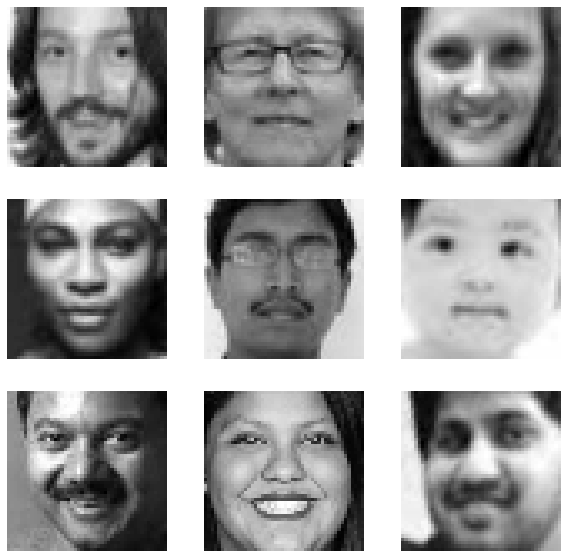

In [3]:
## Preview of the images
plt.figure(figsize=(10, 10))

for index, image in enumerate(np.random.randint(0, 23700, 9)):
    plt.subplot(3, 3, index + 1)
    plt.imshow(images[image],cmap = 'gray')
    plt.axis('off')
plt.show()

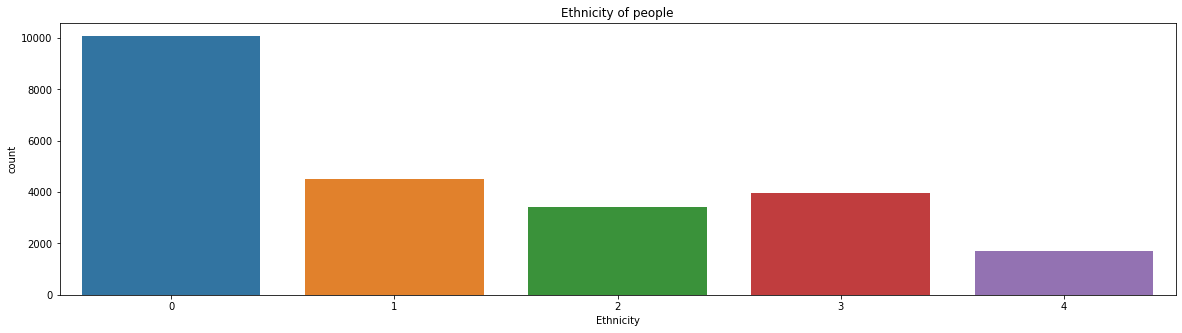

In [4]:
## Distribution of target feature
plt.figure(figsize=(20,5))

sns.countplot(x='ethnicity',data=data)
plt.xlabel('Ethnicity')
plt.title('Ethnicity of people') # Unbalanced
plt.show()

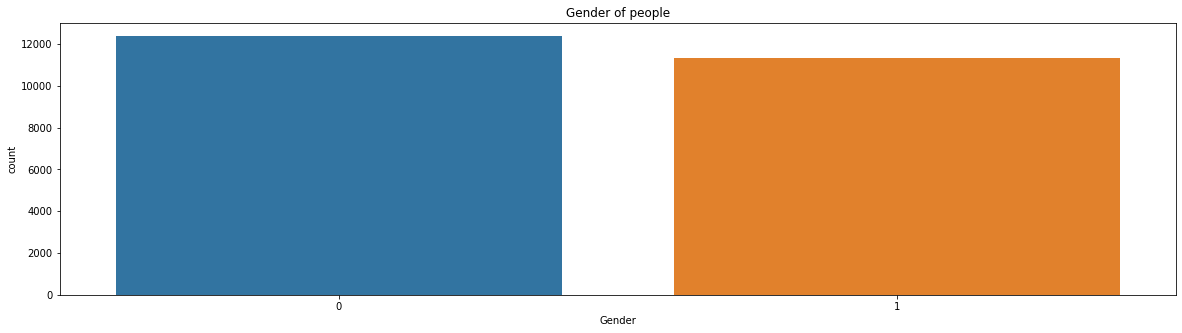

In [5]:
plt.figure(figsize=(20,5))

sns.countplot(x='gender',data=data)
plt.xlabel('Gender')
plt.title('Gender of people') # Balanced
plt.show()

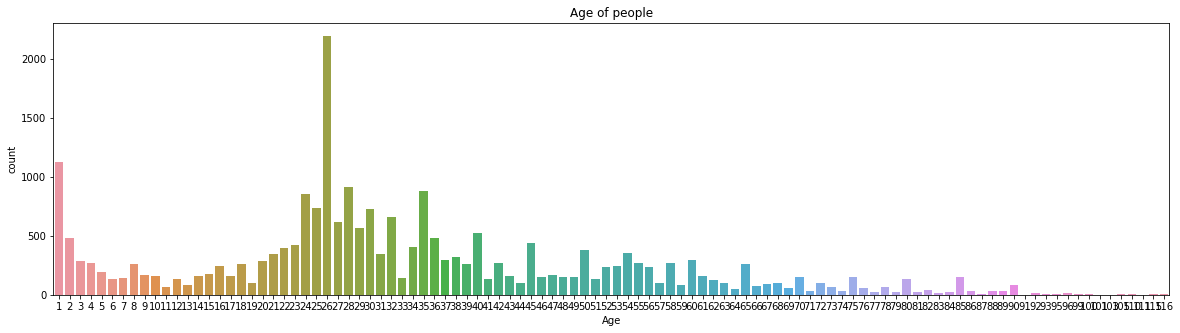

In [6]:
plt.figure(figsize=(20,5))

sns.countplot(x='age',data=data)
plt.xlabel('Age')
plt.title('Age of people') # Unbalanced
plt.show()

In [7]:
#Shuffling the dataset

from sklearn.utils import shuffle

images_gen_shu, gender_shu = shuffle(images, np.array(data['gender']))
images_age_shu, age_shu = shuffle(images, np.array(data['age']))
images_eth_shu, eth_shu = shuffle(images, np.array(data['ethnicity']))

In [8]:
## Spliting data

#Gender model
x_gender_train, x_gender_test, y_gender_train, y_gender_test = train_test_split(images_gen_shu, gender_shu, train_size=0.75, random_state = 1)
x_gender_train, x_gender_val, y_gender_train, y_gender_val = train_test_split(x_gender_train, y_gender_train, train_size=0.7, random_state = 1)

In [9]:
print(x_gender_train.shape, y_gender_train.shape)
print(x_gender_test.shape, y_gender_test.shape)
print(x_gender_val.shape, y_gender_val.shape)

(12444, 48, 48) (12444,)
(5927, 48, 48) (5927,)
(5334, 48, 48) (5334,)


In [109]:
## Ethnicity model

x_ethnicity_train, x_ethnicity_test, y_ethnicity_train, y_ethnicity_test = train_test_split(images_eth_shu, eth_shu, train_size=0.75, random_state = 1)
x_ethnicity_train, x_ethnicity_val, y_ethnicity_train, y_ethnicity_val = train_test_split(x_ethnicity_train, y_ethnicity_train, train_size=0.7, random_state = 1)

In [11]:
print(x_ethnicity_train.shape, y_ethnicity_train.shape)
print(x_ethnicity_test.shape, y_ethnicity_test.shape)
print(x_ethnicity_val.shape, y_ethnicity_val.shape)

(12444, 48, 48) (12444,)
(5927, 48, 48) (5927,)
(5334, 48, 48) (5334,)


In [12]:
## Age model

x_age_train, x_age_test, y_age_train, y_age_test = train_test_split(images_age_shu, age_shu, train_size=0.75, random_state = 1)
x_age_train, x_age_val, y_age_train, y_age_val = train_test_split(x_age_train, y_age_train, train_size=0.7, random_state = 1)

In [13]:
print(x_age_train.shape, y_age_train.shape)
print(x_age_test.shape, y_age_test.shape)
print(x_age_val.shape, y_age_val.shape)

(12444, 48, 48) (12444,)
(5927, 48, 48) (5927,)
(5334, 48, 48) (5334,)


In [14]:
from keras.utils import to_categorical

n_classes = 2
y_gender_train = to_categorical(y_gender_train)
y_gender_test = to_categorical(y_gender_test)
y_gender_val = to_categorical(y_gender_val)

### Applying PCA for the data

In [15]:
from sklearn import decomposition

In [16]:
images.shape

(23705, 48, 48)

In [17]:
images_pca = images.reshape(23705, 48*48)

In [18]:
pca = decomposition.PCA(n_components=1000, whiten=True)
pca.fit(images_pca)

PCA(n_components=1000, whiten=True)

In [19]:
print(pca.components_.shape)

(1000, 2304)


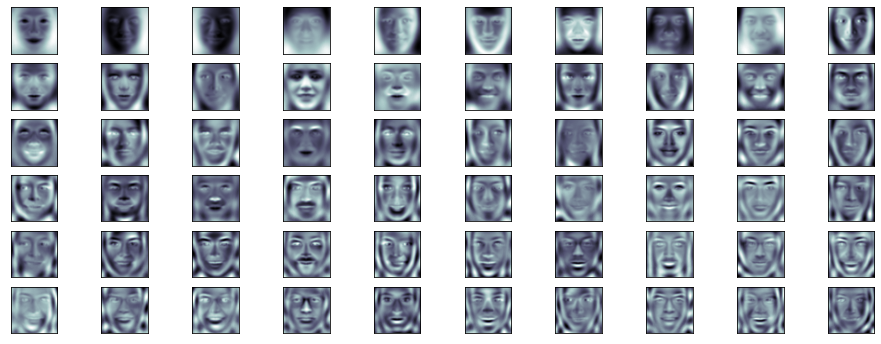

In [20]:
fig = plt.figure(figsize=(16, 6))
for i in range(60):
    ax = fig.add_subplot(6, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(48,48),
              cmap=plt.cm.bone)

In [21]:
#Projecting original training and testing data onto the PCA basis:

images_with_extracted_features = pca.transform(images_pca)
print(images_with_extracted_features.shape)

(23705, 1000)


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(images_pca)
X_sc = scaler.transform(images_pca)

Text(0, 0.5, 'Cumulative explained variance')

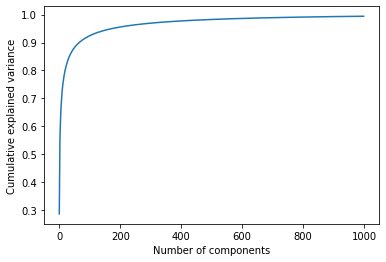

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [24]:
NCOMPONENTS = 500

pca = PCA(n_components=NCOMPONENTS)
X_pca = pca.fit_transform(X_sc)
pca_std = np.std(X_pca)

print(X_sc.shape)
print(X_pca.shape)

(23705, 2304)
(23705, 500)


In [25]:
inv_pca = pca.inverse_transform(X_pca)
inv_sc = scaler.inverse_transform(inv_pca)

In [26]:
inv_pcaless = pca.inverse_transform(X_pca)
inv_scless = scaler.inverse_transform(inv_pcaless)

In [27]:
print(inv_pca.shape)
print(inv_sc.shape)
print(inv_pcaless.shape)
print(inv_scless.shape)

(23705, 2304)
(23705, 2304)
(23705, 2304)
(23705, 2304)


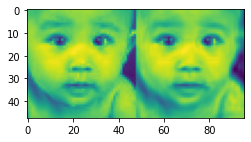

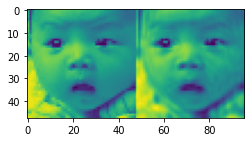

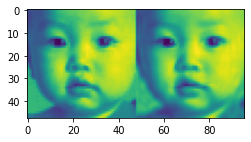

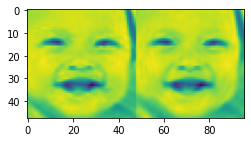

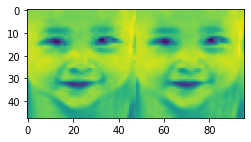

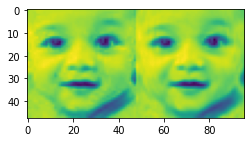

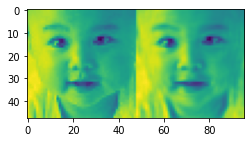

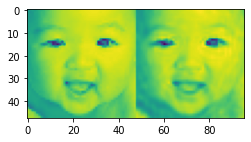

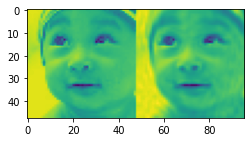

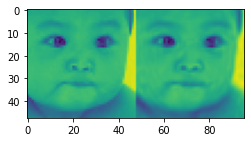

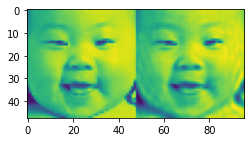

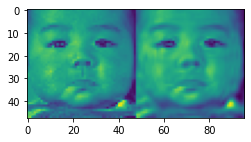

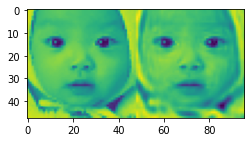

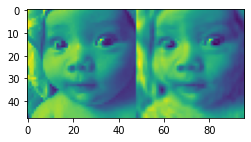

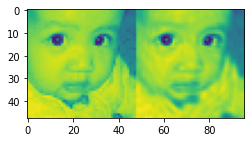

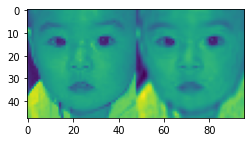

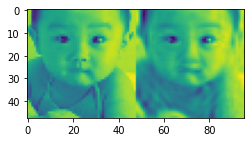

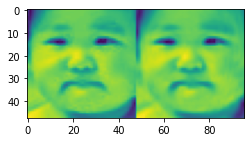

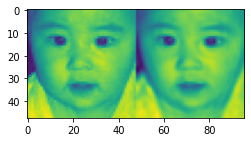

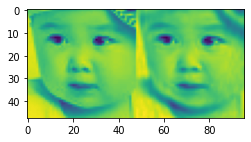

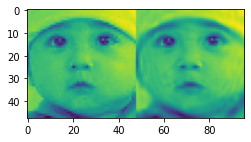

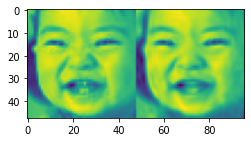

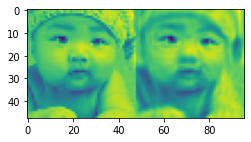

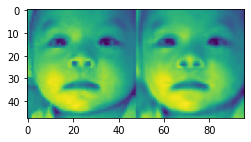

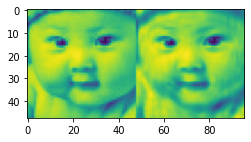

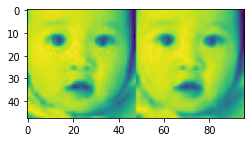

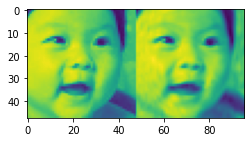

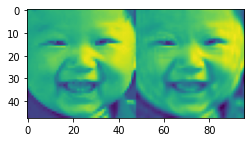

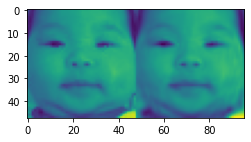

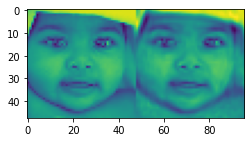

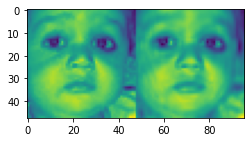

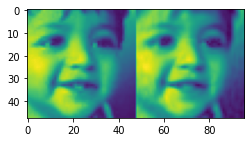

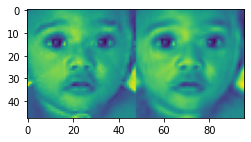

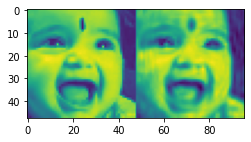

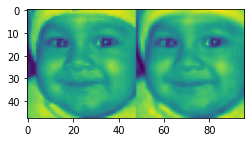

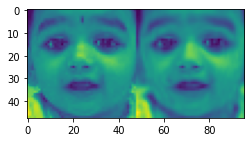

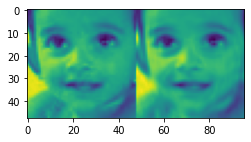

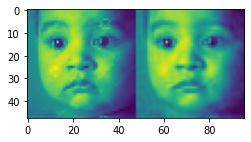

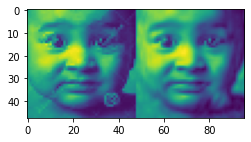

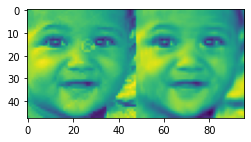

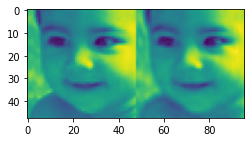

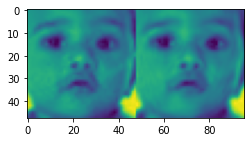

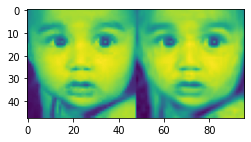

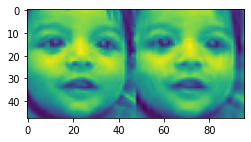

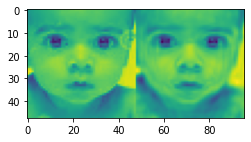

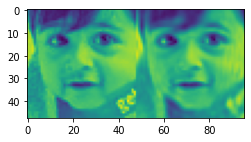

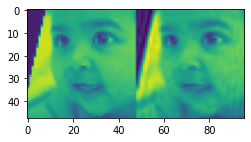

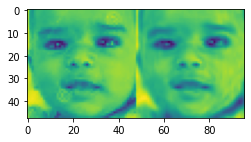

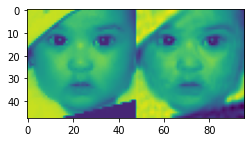

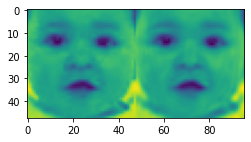

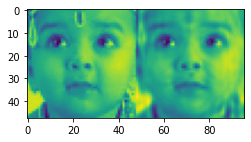

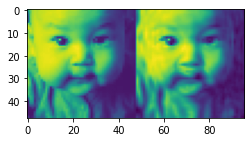

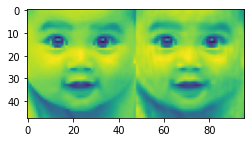

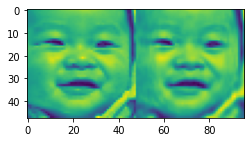

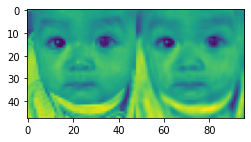

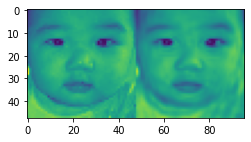

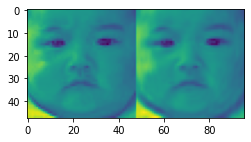

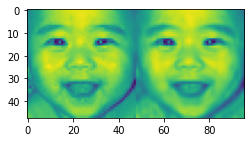

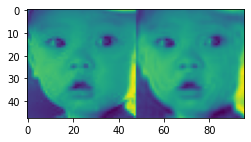

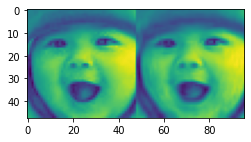

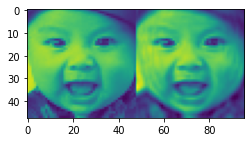

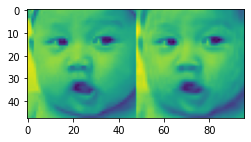

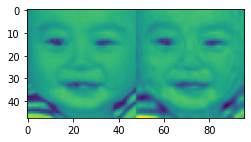

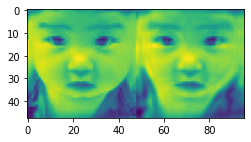

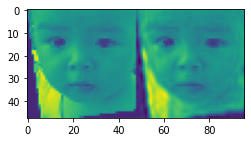

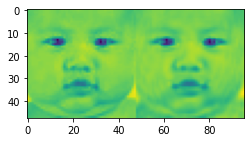

In [28]:
def side_by_side(indexes):
    org = images[indexes].reshape(48,48)
    rec = inv_sc[indexes].reshape(48,48)
    less= inv_scless[indexes].reshape(48,48)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()
    
for index in range(0,100):
    side_by_side(index)

In [29]:
#Shuffling the dataset

images_gen_pca, gender_shu_pca = shuffle(X_pca, np.array(data['gender']))
images_age_pca, age_shu_pca = shuffle(X_pca, np.array(data['age']))
images_eth_pca, eth_shu_pca = shuffle(X_pca, np.array(data['ethnicity']))

In [30]:
## Spliting data

#Gender model
x_gender_train_pca, x_gender_test_pca, y_gender_train_pca, y_gender_test_pca = train_test_split(images_gen_pca, gender_shu_pca, train_size=0.75, random_state = 1)
x_gender_train_pca, x_gender_val_pca, y_gender_train_pca, y_gender_val_pca = train_test_split(x_gender_train_pca, y_gender_train_pca, train_size=0.7, random_state = 1)

In [31]:
print(x_gender_train_pca.shape, y_gender_train_pca.shape)
print(x_gender_test_pca.shape, y_gender_test_pca.shape)
print(x_gender_val_pca.shape, y_gender_val_pca.shape)

(12444, 500) (12444,)
(5927, 500) (5927,)
(5334, 500) (5334,)


In [32]:
## Ethnicity model

x_ethnicity_train_pca, x_ethnicity_test_pca, y_ethnicity_train_pca, y_ethnicity_test_pca = train_test_split(images_eth_pca, eth_shu_pca, train_size=0.75, random_state = 1)
x_ethnicity_train_pca, x_ethnicity_val_pca, y_ethnicity_train_pca, y_ethnicity_val_pca = train_test_split(x_ethnicity_train_pca, y_ethnicity_train_pca, train_size=0.7, random_state = 1)

In [33]:
print(x_ethnicity_train_pca.shape, y_ethnicity_train_pca.shape)
print(x_ethnicity_test_pca.shape, y_ethnicity_test_pca.shape)
print(x_ethnicity_val_pca.shape, y_ethnicity_val_pca.shape)

(12444, 500) (12444,)
(5927, 500) (5927,)
(5334, 500) (5334,)


In [34]:
## Age model

x_age_train_pca, x_age_test_pca, y_age_train_pca, y_age_test_pca = train_test_split(images_age_pca, age_shu_pca, train_size=0.75, random_state = 1)
x_age_train_pca, x_age_val_pca, y_age_train_pca, y_age_val_pca = train_test_split(x_age_train_pca, y_age_train_pca, train_size=0.7, random_state = 1)

In [35]:
print(x_age_train_pca.shape, y_age_train_pca.shape)
print(x_age_test_pca.shape, y_age_test_pca.shape)
print(x_age_val_pca.shape, y_age_val_pca.shape)

(12444, 500) (12444,)
(5927, 500) (5927,)
(5334, 500) (5334,)


# Gender Classifier

### (I). CNN approach

In [36]:
## Gender Model

gender_model = models.Sequential()
gender_model.add(layers.Conv2D(16, (3, 3), activation='relu', padding = 'same', input_shape=(48, 48,1)))
gender_model.add(layers.MaxPooling2D())
gender_model.add(layers.Dropout(0.25))
gender_model.add(layers.Conv2D(16, (3, 3), activation='relu', padding = 'same'))
gender_model.add(layers.MaxPooling2D())
gender_model.add(layers.Dropout(0.25))
gender_model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
gender_model.add(layers.MaxPooling2D())
gender_model.add(layers.Dropout(0.25))
gender_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
gender_model.add(layers.MaxPooling2D())
gender_model.add(layers.Dropout(0.2))
gender_model.add(layers.Flatten())
gender_model.add(layers.Dense(128, activation='relu'))
gender_model.add(layers.Dense(2,activation='softmax'))

gender_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
gender_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4

In [37]:
x_gender_train = np.asarray(x_gender_train).astype(np.float32)
x_gender_test = np.asarray(x_gender_test).astype(np.float32)
x_gender_val = np.asarray(x_gender_val).astype(np.float32)
y_gender_train = np.asarray(y_gender_train).astype(np.float32)
y_gender_test = np.asarray(y_gender_test).astype(np.float32)
y_gender_val = np.asarray(y_gender_val).astype(np.float32)

In [38]:
x_gender_train = x_gender_train.reshape(-1, 48, 48, 1)
x_gender_test = x_gender_test.reshape(-1, 48, 48, 1)
x_gender_val = x_gender_val.reshape(-1, 48, 48, 1)

In [39]:
gender_history = gender_model.fit(x_gender_train,
                                  y_gender_train,
                                  epochs=50,
                                  batch_size = 128,
                                  validation_data=(x_gender_val, y_gender_val))

Epoch 1/50
98/98 [==============================] - 7s 73ms/step - loss: 0.6485 - accuracy: 0.6103 - val_loss: 0.6105 - val_accuracy: 0.6892
Epoch 2/50
98/98 [==============================] - 7s 70ms/step - loss: 0.5684 - accuracy: 0.7069 - val_loss: 0.5147 - val_accuracy: 0.7493
Epoch 3/50
98/98 [==============================] - 7s 71ms/step - loss: 0.5107 - accuracy: 0.7464 - val_loss: 0.4540 - val_accuracy: 0.7930
Epoch 4/50
98/98 [==============================] - 7s 71ms/step - loss: 0.4665 - accuracy: 0.7789 - val_loss: 0.4167 - val_accuracy: 0.8191
Epoch 5/50
98/98 [==============================] - 7s 72ms/step - loss: 0.4338 - accuracy: 0.8008 - val_loss: 0.3880 - val_accuracy: 0.8283
Epoch 6/50
98/98 [==============================] - 7s 72ms/step - loss: 0.4106 - accuracy: 0.8118 - val_loss: 0.3567 - val_accuracy: 0.8472
Epoch 7/50
98/98 [==============================] - 7s 73ms/step - loss: 0.3932 - accuracy: 0.8189 - val_loss: 0.3412 - val_accuracy: 0.8500
Epoch 8/50
98

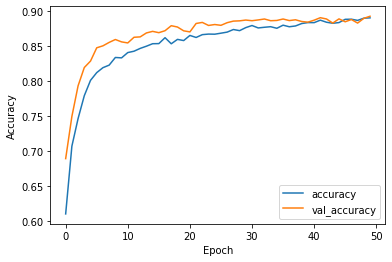

In [40]:
plt.plot(gender_history.history['accuracy'], label='accuracy')
plt.plot(gender_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

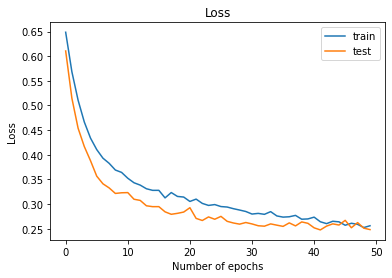

In [41]:
# plot loss during training
plt.title('Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.plot(gender_history.history['loss'], label='train')
plt.plot(gender_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [42]:
test_loss, test_acc = gender_model.evaluate(x_gender_test, y_gender_test, verbose=2)

186/186 - 2s - loss: 0.2599 - accuracy: 0.8856


In [43]:
#Predicted values
y_pred_gen = gender_model.predict(x_gender_test)
y_pred_gen.shape

(5927, 2)

In [44]:
#Prepare data to plot the confusion matrix

y_pred_gen = np.argmax(y_pred_gen, axis=1)
y_gender_test_cm = np.argmax(y_gender_test, axis = 1)

In [45]:
#Plot of confusion matrix

import sklearn.metrics as metrics
import seaborn as sns

class_names = ['Female', 'Male']
cm = metrics.confusion_matrix(y_gender_test_cm, y_pred_gen)
df_cm = pd.DataFrame(cm, index = class_names, columns=class_names).astype(int)

sns.heatmap(df_cm, annot= True, annot_kws={"size": 16}, fmt="d")
plt.xlabel('True label')
plt.ylabel('Predicted label')

Text(33.0, 0.5, 'Predicted label')

In [174]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#y_pred_gen = np.argmax(y_pred_gen, axis=1)
fpr_gen, tpr_gen, thresholds_gen = roc_curve(y_gender_test_cm, y_pred_gen)

auc_gen = auc(fpr_gen, tpr_gen)

In [175]:
# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_gen, tpr_gen, label='Gen (area = {:.3f})'.format(auc_gen))

# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()

In [167]:
y_pred_gender = gender_model.predict(x_gender_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_gender_test[:, i], y_pred_gender[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_gender_test.ravel(), y_pred_gender.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-173-3067363332e3>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
No handles with labels found to put in legend.


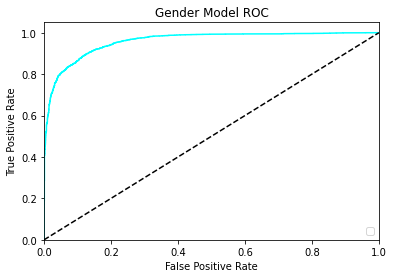

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red', 'green'])
for i, color in zip(range(1), colors):
    plt.plot(fpr[i], tpr[i], color=color)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Model ROC')
plt.legend(loc="lower right")
plt.show()

### Visulaizing feature maps

In [48]:
# summarize feature map shapes
for i in range(len(gender_model.layers)):
    layer = gender_model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d (None, 48, 48, 16)
3 conv2d_1 (None, 24, 24, 16)
6 conv2d_2 (None, 12, 12, 32)
9 conv2d_3 (None, 6, 6, 64)


In [49]:
#1st convolutional layer

from keras.models import Model

conv1_gen = Model(inputs=gender_model.inputs, outputs=gender_model.layers[0].output)
conv1_gen.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [50]:
x_gender_train.shape

(12444, 48, 48, 1)

In [51]:
img = x_gender_train[1, :]
#img = img.reshape(48, 48)

In [52]:
feature_maps_conv1_gen = conv1_gen.predict(img)

In [53]:
f_conv1_gen = feature_maps_conv1_gen[:, :, :, 1]
f_conv1_gen = f_conv1_gen.reshape(48, 48)
plt.imshow(f_conv1_gen, cmap='gray')

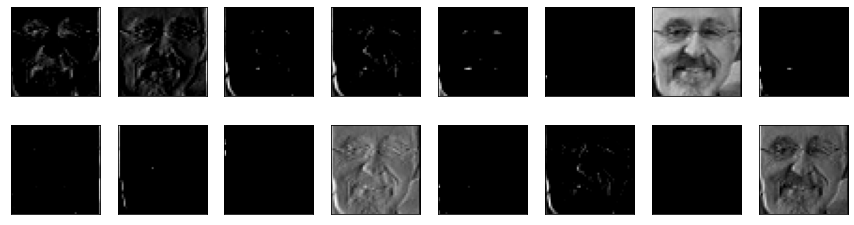

In [54]:
from matplotlib import pyplot

square = 8
rows = 2
ix = 1

plt.figure(figsize=(15,4))
for _ in range(rows):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(rows, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps_conv1_gen[:, :, :, ix-1], cmap='gray')
        ix += 1
    # show the figure
pyplot.show()

In [55]:
#2nd convolutional layer

conv2_gen = Model(inputs=gender_model.inputs, outputs=gender_model.layers[3].output)
conv2_gen.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
Total params: 2,480
Trainable params: 2,480
Non-trainable params: 0
_________________________________________________________________


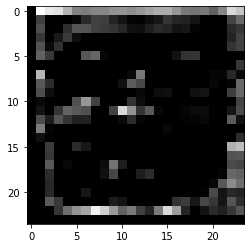

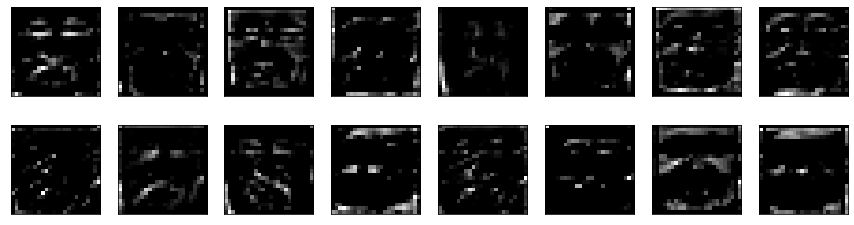

In [56]:
img = x_gender_train[1, :]
img = tf.expand_dims(img, axis=0)
feature_maps_conv2_gen = conv2_gen.predict(img)
f_conv2_gen = feature_maps_conv2_gen[:, :, :, 6]
f_conv2_gen = f_conv2_gen.reshape(24, 24)
plt.imshow(f_conv2_gen, cmap='gray')
plt.show()

square = 8
rows = 2
ix = 1

plt.figure(figsize=(15,4))
for _ in range(rows):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(rows, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        feature_maps_conv2_gen = feature_maps_conv2_gen.reshape(24, 24, 16)
        pyplot.imshow(feature_maps_conv2_gen[:, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

In [57]:
#3rd convolutional layer

conv3_gen = Model(inputs=gender_model.inputs, outputs=gender_model.layers[6].output)
conv3_gen.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)       

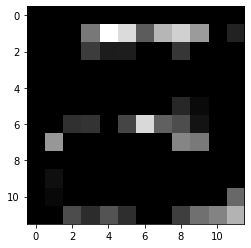

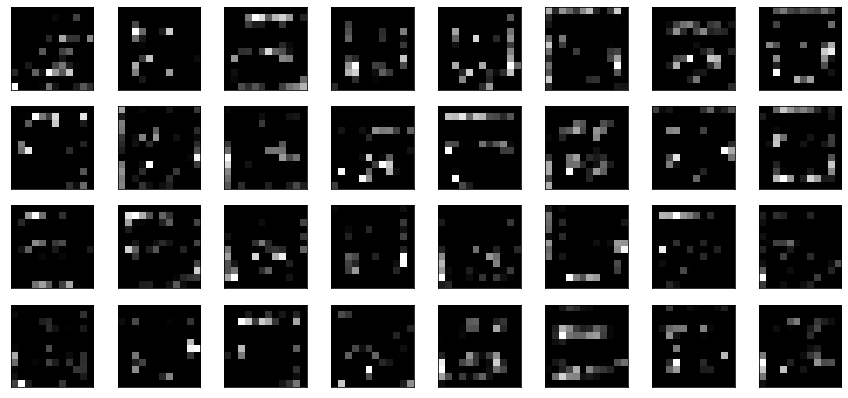

In [58]:
img = x_gender_train[1, :]
img = tf.expand_dims(img, axis=0)
feature_maps_conv3_gen = conv3_gen.predict(img)
f_conv3_gen = feature_maps_conv3_gen[:, :, :, 2]
f_conv3_gen = f_conv3_gen.reshape(12, 12)
plt.imshow(f_conv3_gen, cmap='gray')
plt.show()

square = 8
rows = 4
ix = 1

plt.figure(figsize=(15,7))
for _ in range(rows):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(rows, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        feature_maps_conv3_gen = feature_maps_conv3_gen.reshape(12, 12, 32)
        pyplot.imshow(feature_maps_conv3_gen[:, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

In [59]:
#4th convolutional layer

conv4_gen = Model(inputs=gender_model.inputs, outputs=gender_model.layers[9].output)
conv4_gen.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)       

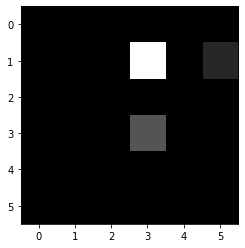

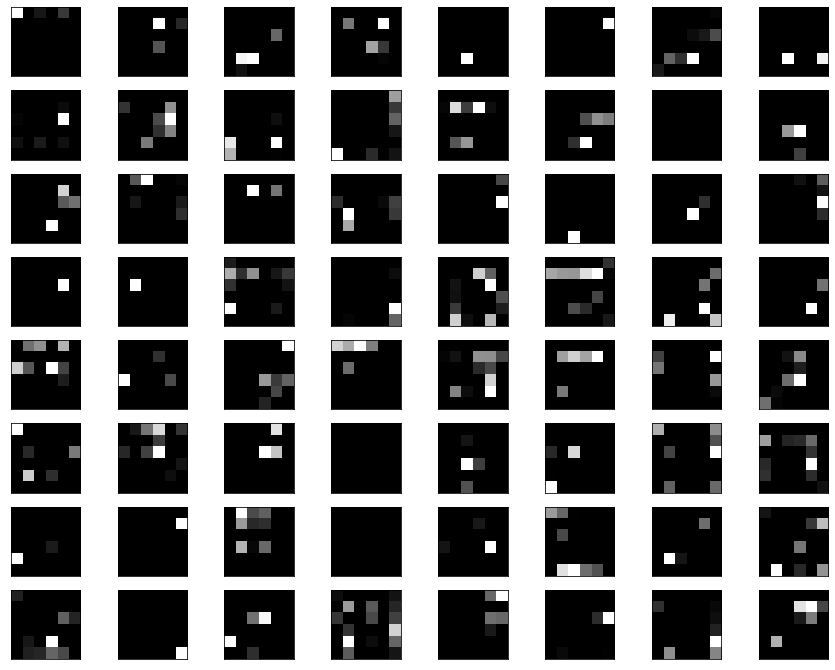

In [60]:
img = x_gender_train[1, :]
img = tf.expand_dims(img, axis=0)
feature_maps_conv4_gen = conv4_gen.predict(img)
f_conv4_gen = feature_maps_conv4_gen[:, :, :, 1]
f_conv4_gen = f_conv4_gen.reshape(6, 6)
plt.imshow(f_conv4_gen, cmap='gray')
plt.show()

square = 8
rows = 8
ix = 1

plt.figure(figsize=(15,12))
for _ in range(rows):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(rows, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        feature_maps_conv4_gen = feature_maps_conv4_gen.reshape(6, 6, 64)
        pyplot.imshow(feature_maps_conv4_gen[:, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

### (II). DNN approach

In [61]:
x_gender_train_dnn = x_gender_train.reshape(12444, 2304)
x_gender_test_dnn = x_gender_test.reshape(5927, 2304)
x_gender_val_dnn = x_gender_val.reshape(5334, 2304)

In [62]:
#Gender model DNN

gender_model_dnn = models.Sequential()
gender_model_dnn.add(layers.Dense(1024, input_dim = 2304, activation='relu'))
gender_model_dnn.add(layers.Dropout(0.5))
gender_model_dnn.add(layers.Dense(1024, activation='relu'))
gender_model_dnn.add(layers.Dropout(0.25))
gender_model_dnn.add(layers.Dense(512, activation='relu'))
gender_model_dnn.add(layers.Dropout(0.4))
gender_model_dnn.add(layers.Dense(256, activation='relu'))
gender_model_dnn.add(layers.Dropout(0.5))
gender_model_dnn.add(layers.Dense(128, activation='softmax'))
gender_model_dnn.add(layers.Dense(2))

gender_model_dnn.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics = ['accuracy'])
gender_model_dnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1024)              2360320   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)              

In [63]:
history_gen_dnn = gender_model_dnn.fit(x_gender_train_dnn, y_gender_train, epochs=50, 
                    validation_data=(x_gender_val_dnn, y_gender_val))

Epoch 1/50
389/389 [==============================] - 10s 26ms/step - loss: 0.8760 - accuracy: 0.4828 - val_loss: 0.6976 - val_accuracy: 0.4762
Epoch 2/50
389/389 [==============================] - 9s 24ms/step - loss: 0.6934 - accuracy: 0.5183 - val_loss: 0.6921 - val_accuracy: 0.5238
Epoch 3/50
389/389 [==============================] - 10s 25ms/step - loss: 0.6921 - accuracy: 0.5243 - val_loss: 0.6920 - val_accuracy: 0.5238
Epoch 4/50
389/389 [==============================] - 10s 25ms/step - loss: 0.6920 - accuracy: 0.5243 - val_loss: 0.6922 - val_accuracy: 0.5238
Epoch 5/50
389/389 [==============================] - 10s 25ms/step - loss: 0.6921 - accuracy: 0.5243 - val_loss: 0.6920 - val_accuracy: 0.5238
Epoch 6/50
389/389 [==============================] - 10s 25ms/step - loss: 0.6921 - accuracy: 0.5243 - val_loss: 0.6921 - val_accuracy: 0.5238
Epoch 7/50
389/389 [==============================] - 10s 25ms/step - loss: 0.6921 - accuracy: 0.5243 - val_loss: 0.6920 - val_accuracy: 

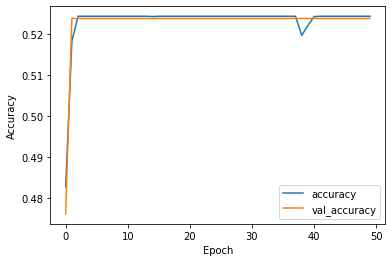

In [64]:
#Plot of accuracy during training

plt.plot(history_gen_dnn.history['accuracy'], label='accuracy')
plt.plot(history_gen_dnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

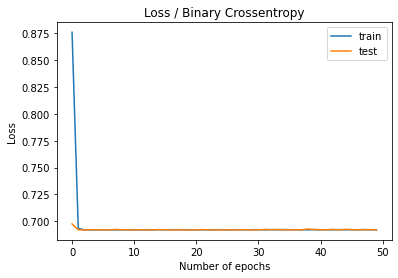

In [65]:
# plot loss during training

plt.title('Loss / Binary Crossentropy')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.plot(history_gen_dnn.history['loss'], label='train')
plt.plot(history_gen_dnn.history['val_loss'], label='test')
plt.legend()
plt.show()

In [66]:
test_loss_dnn, test_acc_dnn = gender_model_dnn.evaluate(x_gender_test_dnn, y_gender_test, verbose=2)

186/186 - 1s - loss: 0.6925 - accuracy: 0.5183


In [67]:
#Predicted values
y_pred_gen_dnn = gender_model_dnn.predict(x_gender_test_dnn)
y_pred_gen_dnn.shape

(5927, 2)

In [68]:
y_pred_gen_dnn

array([[0.52286553, 0.47713435],
       [0.52286553, 0.47713435],
       [0.52286553, 0.47713435],
       ...,
       [0.52286553, 0.47713435],
       [0.52286553, 0.47713435],
       [0.52286553, 0.47713435]], dtype=float32)

In [69]:
#Prepare data to plot the confusion matrix

y_pred_gen_dnn = np.argmax(y_pred_gen_dnn, axis=1)
y_gender_test_cm_dnn = np.argmax(y_gender_test, axis = 1)

In [70]:
y_pred_gen_dnn

array([0, 0, 0, ..., 0, 0, 0])

Text(33.0, 0.5, 'Predicted label')

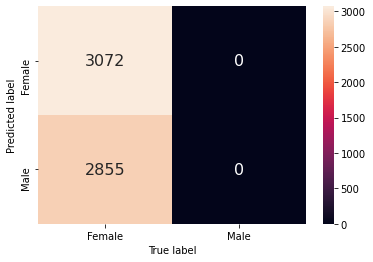

In [71]:
#Plot of confusion matrix

class_names = ['Female', 'Male']
cm_dnn = metrics.confusion_matrix(y_gender_test_cm_dnn, y_pred_gen_dnn)
df_cm_dnn = pd.DataFrame(cm_dnn, index = class_names, columns=class_names).astype(int)

sns.heatmap(df_cm_dnn, annot= True, annot_kws={"size": 16}, fmt="d")
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [72]:
#y_pred_gen = np.argmax(y_pred_gen, axis=1)
fpr_gen_dnn, tpr_gen_dnn, thresholds_gen_dnn = roc_curve(y_gender_test_cm_dnn, y_pred_gen_dnn)
auc_gen_dnn = auc(fpr_gen_dnn, tpr_gen_dnn)

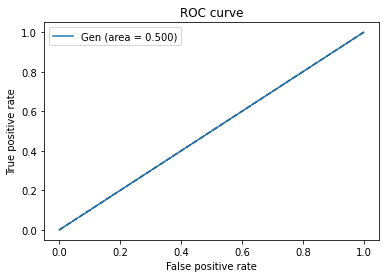

In [73]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gen_dnn, tpr_gen_dnn, label='Gen (area = {:.3f})'.format(auc_gen_dnn))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### (III). PCA approach

In [74]:
#Gender model DNN

gender_model_pca = models.Sequential()
gender_model_pca.add(layers.Dense(1024, input_dim = 500, activation='relu'))
gender_model_pca.add(layers.Dropout(0.5))
gender_model_pca.add(layers.Dense(1024, activation='relu'))
gender_model_pca.add(layers.Dropout(0.25))
gender_model_pca.add(layers.Dense(512, activation='relu'))
gender_model_pca.add(layers.Dropout(0.4))
gender_model_pca.add(layers.Dense(256, activation='relu'))
gender_model_pca.add(layers.Dropout(0.5))
gender_model_pca.add(layers.Dense(128, activation='softmax'))
gender_model_pca.add(layers.Dense(2))

gender_model_pca.compile(optimizer='sgd',
              loss='binary_crossentropy', 
              metrics = ['accuracy'])
gender_model_pca.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              513024    
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)              

In [75]:
history_gen_pca = gender_model_pca.fit(x_gender_train_pca, y_gender_train_pca, epochs=100, 
                    validation_data=(x_gender_val_pca, y_gender_val_pca))

Epoch 1/100
389/389 [==============================] - 9s 22ms/step - loss: 7.9493 - accuracy: 0.4925 - val_loss: 7.9963 - val_accuracy: 0.4756
Epoch 2/100
389/389 [==============================] - 9s 22ms/step - loss: 7.9984 - accuracy: 0.4838 - val_loss: 7.9963 - val_accuracy: 0.4756
Epoch 3/100
389/389 [==============================] - 9s 22ms/step - loss: 7.9984 - accuracy: 0.4960 - val_loss: 7.9963 - val_accuracy: 0.4756
Epoch 4/100
389/389 [==============================] - 8s 21ms/step - loss: 7.9984 - accuracy: 0.4904 - val_loss: 7.9963 - val_accuracy: 0.4756
Epoch 5/100
389/389 [==============================] - 8s 22ms/step - loss: 7.9984 - accuracy: 0.4860 - val_loss: 7.9963 - val_accuracy: 0.4756
Epoch 6/100
389/389 [==============================] - 9s 23ms/step - loss: 7.9984 - accuracy: 0.4928 - val_loss: 7.9963 - val_accuracy: 0.4756
Epoch 7/100
389/389 [==============================] - 9s 24ms/step - loss: 7.9984 - accuracy: 0.4908 - val_loss: 7.9963 - val_accuracy:

389/389 [==============================] - 8s 21ms/step - loss: 7.9984 - accuracy: 0.4877 - val_loss: 7.9963 - val_accuracy: 0.4756
Epoch 58/100
389/389 [==============================] - 8s 22ms/step - loss: 7.9984 - accuracy: 0.4884 - val_loss: 7.9963 - val_accuracy: 0.4756
Epoch 59/100
389/389 [==============================] - 8s 21ms/step - loss: 7.9984 - accuracy: 0.4923 - val_loss: 7.9963 - val_accuracy: 0.4756
Epoch 60/100
389/389 [==============================] - 8s 21ms/step - loss: 7.9984 - accuracy: 0.4966 - val_loss: 7.9963 - val_accuracy: 0.4756
Epoch 61/100
389/389 [==============================] - 8s 21ms/step - loss: 7.9984 - accuracy: 0.4960 - val_loss: 7.9963 - val_accuracy: 0.4756
Epoch 62/100
389/389 [==============================] - 9s 23ms/step - loss: 7.9984 - accuracy: 0.4937 - val_loss: 7.9963 - val_accuracy: 0.4756
Epoch 63/100
389/389 [==============================] - 9s 24ms/step - loss: 7.9984 - accuracy: 0.4892 - val_loss: 7.9963 - val_accuracy: 0.475

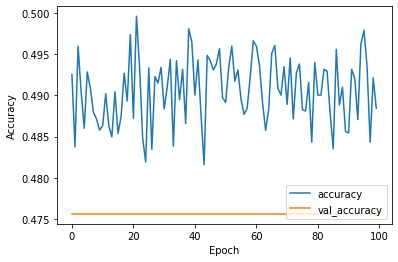

In [76]:
#Plot of accuracy during training

plt.plot(history_gen_pca.history['accuracy'], label='accuracy')
plt.plot(history_gen_pca.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

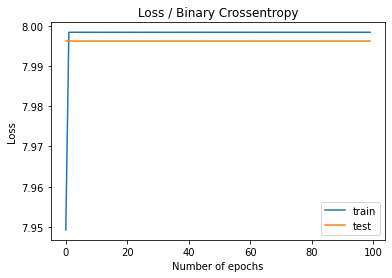

In [77]:
# plot loss during training

plt.title('Loss / Binary Crossentropy')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.plot(history_gen_pca.history['loss'], label='train')
plt.plot(history_gen_pca.history['val_loss'], label='test')
plt.legend()
plt.show()

In [78]:
test_loss_pca, test_acc_pca = gender_model_pca.evaluate(x_gender_test_pca, y_gender_test_pca, verbose=2)

186/186 - 1s - loss: 7.8909 - accuracy: 0.4825


In [79]:
#Predicted values
y_pred_gen_pca = gender_model_pca.predict(x_gender_test_pca)
y_pred_gen_pca.shape

(5927, 2)

In [80]:
y_pred_gen_pca

array([[2.8228815, 4.4576936],
       [2.8228817, 4.457678 ],
       [2.8228815, 4.4576936],
       ...,
       [2.8229666, 4.4436216],
       [2.8228815, 4.4576845],
       [2.8229241, 4.450609 ]], dtype=float32)

In [81]:
#Prepare data to plot the confusion matrix

y_pred_gen_pca = np.argmax(y_pred_gen_pca, axis=1)

Text(33.0, 0.5, 'Predicted label')

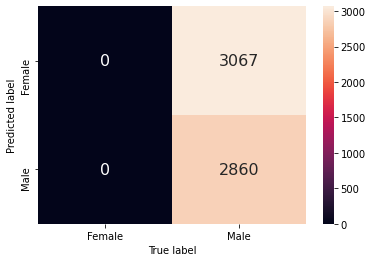

In [82]:
#Plot of confusion matrix

class_names = ['Female', 'Male']
cm_pca = metrics.confusion_matrix(y_gender_test_pca, y_pred_gen_pca)
df_cm_pca = pd.DataFrame(cm_pca, index = class_names, columns=class_names).astype(int)

sns.heatmap(df_cm_pca, annot= True, annot_kws={"size": 16}, fmt="d")
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [83]:
#y_pred_gen = np.argmax(y_pred_gen, axis=1)
fpr_gen_pca, tpr_gen_pca, thresholds_gen_pca = roc_curve(y_gender_test_pca, y_pred_gen_pca)
auc_gen_pca = auc(fpr_gen_pca, tpr_gen_pca)

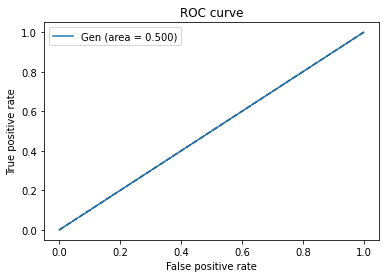

In [84]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gen_pca, tpr_gen_pca, label='Gen (area = {:.3f})'.format(auc_gen_pca))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Ethnicity model

### CNN approach

In [110]:
n_classes = 5
y_ethnicity_train = to_categorical(y_ethnicity_train)
y_ethnicity_test = to_categorical(y_ethnicity_test)
y_ethnicity_val = to_categorical(y_ethnicity_val)

In [111]:
x_ethnicity_train = np.asarray(x_ethnicity_train).astype(np.float32)
x_ethnicity_test = np.asarray(x_ethnicity_test).astype(np.float32)
x_ethnicity_val = np.asarray(x_ethnicity_val).astype(np.float32)
y_ethnicity_train = np.asarray(y_ethnicity_train).astype(np.float32)
y_ethnicity_test = np.asarray(y_ethnicity_test).astype(np.float32)
y_ethnicity_val = np.asarray(y_ethnicity_val).astype(np.float32)

In [112]:
x_ethnicity_train = x_ethnicity_train.reshape(-1, 48, 48, 1)
x_ethnicity_test = x_ethnicity_test.reshape(-1, 48, 48, 1)
x_ethnicity_val = x_ethnicity_val.reshape(-1, 48, 48, 1)

In [113]:
from sklearn import preprocessing
y_ethnicity_train = preprocessing.label_binarize(y_ethnicity_train, classes=[0, 1, 2, 3, 4])
y_ethnicity_test = preprocessing.label_binarize(y_ethnicity_test, classes=[0, 1, 2, 3, 4])
y_ethnicity_val = preprocessing.label_binarize(y_ethnicity_val, classes=[0, 1, 2, 3, 4])

In [114]:
## Ethnicity Model

ethnicity_model = models.Sequential()
ethnicity_model.add(layers.Conv2D(16, (3, 3), activation='elu', padding = 'same', input_shape=(48, 48,1)))
ethnicity_model.add(layers.MaxPooling2D())
ethnicity_model.add(layers.Dropout(0.4))
ethnicity_model.add(layers.Conv2D(16, (3, 3), activation='elu', padding = 'same'))
ethnicity_model.add(layers.MaxPooling2D())
ethnicity_model.add(layers.Dropout(0.4))
ethnicity_model.add(layers.Conv2D(32, (3, 3), activation='elu', padding='same'))
ethnicity_model.add(layers.MaxPooling2D())
ethnicity_model.add(layers.Dropout(0.25))
ethnicity_model.add(layers.Conv2D(64, (3, 3), activation='elu', padding='same'))
ethnicity_model.add(layers.MaxPooling2D())
ethnicity_model.add(layers.Dropout(0.25))
ethnicity_model.add(layers.Flatten())
ethnicity_model.add(layers.Dense(128, activation='elu'))
ethnicity_model.add(layers.Dense(5,activation='softmax'))

ethnicity_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
ethnicity_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 32)       

In [115]:
ethnicity_history = ethnicity_model.fit(x_ethnicity_train,
                                  y_ethnicity_train,
                                  epochs=30,
                                  validation_data=(x_ethnicity_val, y_ethnicity_val))

Epoch 1/30
389/389 [==============================] - 13s 33ms/step - loss: 1.3502 - accuracy: 0.4672 - val_loss: 1.2323 - val_accuracy: 0.5244
Epoch 2/30
389/389 [==============================] - 14s 35ms/step - loss: 1.1342 - accuracy: 0.5641 - val_loss: 0.9732 - val_accuracy: 0.6494
Epoch 3/30
389/389 [==============================] - 14s 37ms/step - loss: 1.0050 - accuracy: 0.6341 - val_loss: 0.9075 - val_accuracy: 0.6760
Epoch 4/30
389/389 [==============================] - 13s 34ms/step - loss: 0.9445 - accuracy: 0.6554 - val_loss: 0.8684 - val_accuracy: 0.6888
Epoch 5/30
389/389 [==============================] - 13s 34ms/step - loss: 0.9026 - accuracy: 0.6696 - val_loss: 0.8353 - val_accuracy: 0.6965
Epoch 6/30
389/389 [==============================] - 13s 34ms/step - loss: 0.8737 - accuracy: 0.6835 - val_loss: 0.7912 - val_accuracy: 0.7192
Epoch 7/30
389/389 [==============================] - 13s 32ms/step - loss: 0.8570 - accuracy: 0.6894 - val_loss: 0.7884 - val_accuracy:

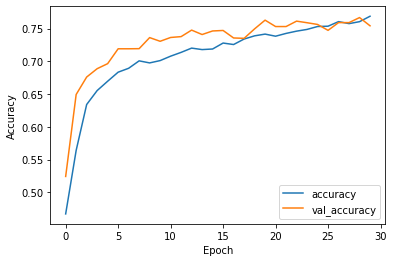

In [116]:
plt.plot(ethnicity_history.history['accuracy'], label='accuracy')
plt.plot(ethnicity_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

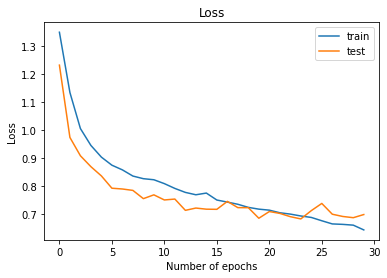

In [117]:
# plot loss during training
plt.title('Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.plot(ethnicity_history.history['loss'], label='train')
plt.plot(ethnicity_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [118]:
test_loss, test_acc = ethnicity_model.evaluate(x_ethnicity_test, y_ethnicity_test, verbose=2)

186/186 - 2s - loss: 0.6869 - accuracy: 0.7635


In [119]:
#Predicted values
y_pred_eth = ethnicity_model.predict(x_ethnicity_test)
y_pred_eth.shape

(5927, 5)

In [120]:
#Prepare data to plot the confusion matrix

y_pred_eth = np.argmax(y_pred_eth, axis=1)
y_ethnicity_test_cm = np.argmax(y_ethnicity_test, axis = 1)

Text(33.0, 0.5, 'Predicted label')

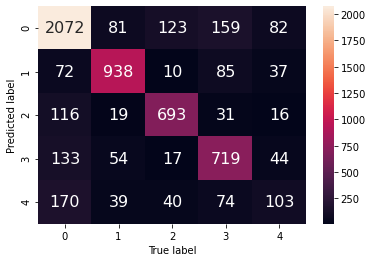

In [121]:
#Plot of confusion matrix

#lass_names = ['Female', 'Male']
cm = metrics.confusion_matrix(y_ethnicity_test_cm, y_pred_eth)
df_cm = pd.DataFrame(cm).astype(int)

sns.heatmap(df_cm, annot= True, annot_kws={"size": 16}, fmt="d")
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [122]:
###############################################
# PLot the multiclass ROC curve
#############################################

In [133]:
y_pred_eth.shape

(5927,)

In [134]:
y_pred_eth = ethnicity_model.predict(x_ethnicity_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_ethnicity_test[:, i], y_pred_eth[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_ethnicity_test.ravel(), y_pred_eth.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-142-662f7f514c69>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


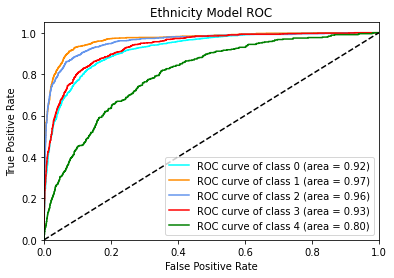

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ethnicity Model ROC')
plt.legend(loc="lower right")
plt.show()

In [143]:
#y_pred_gen = np.argmax(y_pred_gen, axis=1)


# fpr_eth, tpr_eth, thresholds_eth = roc_curve(y_ethnicity_test_cm, y_pred_eth)

# auc_gen = auc(fpr_eth, tpr_eth)

### Visulaizing feature maps

In [144]:
# summarize feature map shapes
for i in range(len(gender_model.layers)):
    layer = ethnicity_model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d_16 (None, 48, 48, 16)
3 conv2d_17 (None, 24, 24, 16)
6 conv2d_18 (None, 12, 12, 32)
9 conv2d_19 (None, 6, 6, 64)


In [145]:
#1st convolutional layer

from keras.models import Model

conv1_eth = Model(inputs=ethnicity_model.inputs, outputs=ethnicity_model.layers[0].output)
conv1_eth.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16_input (InputLayer) [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 48, 48, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [146]:
img = x_ethnicity_train[1, :]

In [147]:
feature_maps_conv1_eth = conv1_eth.predict(img)

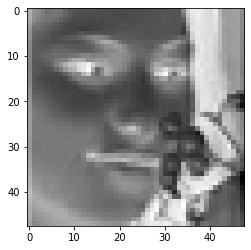

In [148]:
f_conv1_eth = feature_maps_conv1_eth[:, :, :, 0]
f_conv1_eth = f_conv1_eth.reshape(48, 48)
plt.imshow(f_conv1_eth, cmap='gray')

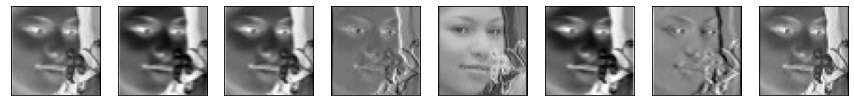

In [149]:
from matplotlib import pyplot

square = 8
rows = 1
ix = 1

plt.figure(figsize=(15,7))
for _ in range(square):
    # specify subplot and turn of axis
    ax = pyplot.subplot(rows, square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    pyplot.imshow(feature_maps_conv1_eth[:, :, :, ix-1], cmap='gray')
    ix += 1
# show the figure
pyplot.show()

In [150]:
#2nd convolutional layer

conv2_eth = Model(inputs=ethnicity_model.inputs, outputs=ethnicity_model.layers[3].output)
conv2_eth.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16_input (InputLayer) [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 16)        2320      
Total params: 2,480
Trainable params: 2,480
Non-trainable params: 0
_________________________________________________________________


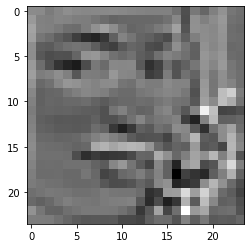

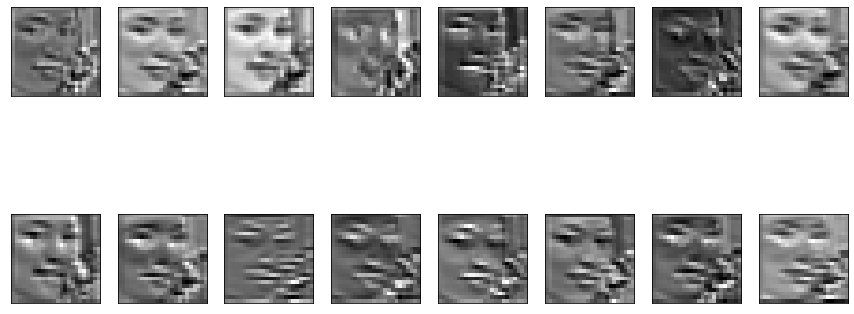

In [151]:
img = x_ethnicity_train[1, :]
img = tf.expand_dims(img, axis=0)
feature_maps_conv2_eth = conv2_eth.predict(img)
f_conv2_eth = feature_maps_conv2_eth[:, :, :, 0]
f_conv2_eth = f_conv2_eth.reshape(24, 24)
plt.imshow(f_conv2_eth, cmap='gray')
plt.show()

square = 8
rows = 2
ix = 1
plt.figure(figsize=(15,7))
for _ in range(rows):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(rows, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        feature_maps_conv2_eth = feature_maps_conv2_eth.reshape(24, 24, 16)
        pyplot.imshow(feature_maps_conv2_eth[:, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

In [152]:
#3rd convolutional layer

conv3_eth = Model(inputs=ethnicity_model.inputs, outputs=ethnicity_model.layers[6].output)
conv3_eth.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16_input (InputLayer) [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 12, 12, 16)      

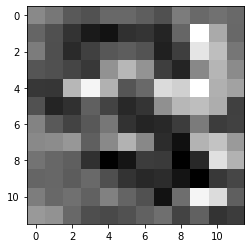

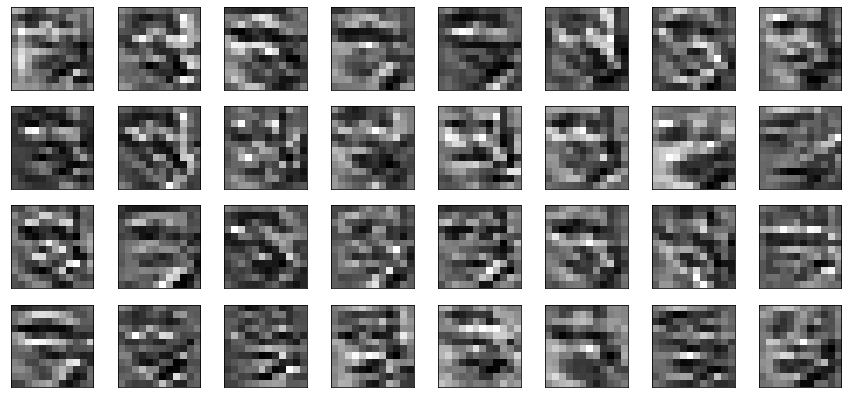

In [153]:
img = x_ethnicity_train[1, :]
img = tf.expand_dims(img, axis=0)
feature_maps_conv3_eth = conv3_eth.predict(img)
f_conv3_eth = feature_maps_conv3_eth[:, :, :, 1]
f_conv3_eth = f_conv3_eth.reshape(12, 12)
plt.imshow(f_conv3_eth, cmap='gray')
plt.show()

square = 8
rows = 4
ix = 1

plt.figure(figsize=(15,7))
for _ in range(rows):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(rows, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        feature_maps_conv3_eth = feature_maps_conv3_eth.reshape(12, 12, 32)
        pyplot.imshow(feature_maps_conv3_eth[:, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

In [154]:
#4th convolutional layer

conv4_eth = Model(inputs=ethnicity_model.inputs, outputs=ethnicity_model.layers[9].output)
conv4_eth.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16_input (InputLayer) [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 12, 12, 16)      

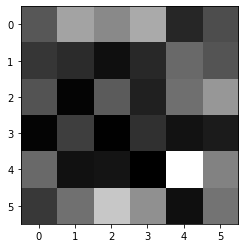

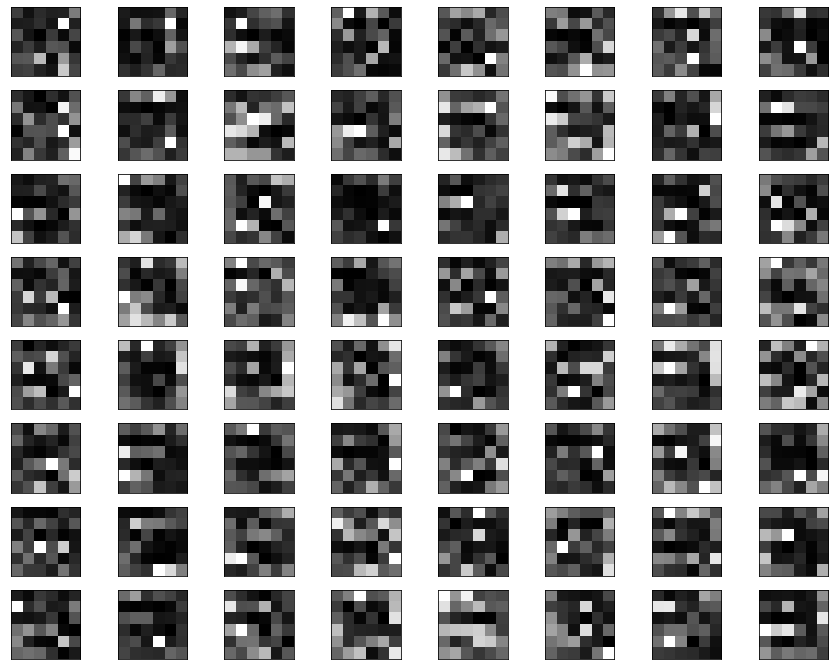

In [155]:
img = x_ethnicity_train[1, :]
img = tf.expand_dims(img, axis=0)
feature_maps_conv4_eth = conv4_eth.predict(img)
f_conv4_eth = feature_maps_conv4_eth[:, :, :, 4]
f_conv4_eth = f_conv4_eth.reshape(6, 6)
plt.imshow(f_conv4_eth, cmap='gray')
plt.show()

square = 8
rows = 8
ix = 1

plt.figure(figsize=(15,12))
for _ in range(rows):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(rows, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        feature_maps_conv4_eth = feature_maps_conv4_eth.reshape(6, 6, 64)
        pyplot.imshow(feature_maps_conv4_eth[:, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

## Age model

### (I). CNN model

In [156]:
## Age Model Classificaiton

age_model = models.Sequential()
age_model.add(layers.Conv2D(16, (3, 3), activation='relu', padding = 'same', input_shape=(48, 48,1)))
age_model.add(layers.MaxPooling2D(2,2))
age_model.add(layers.Dropout(0.25))
age_model.add(layers.Conv2D(16, (3, 3), activation='relu', padding = 'same'))
age_model.add(layers.MaxPooling2D(2,2))
age_model.add(layers.Dropout(0.25))
age_model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
age_model.add(layers.MaxPooling2D(2,2))
age_model.add(layers.Dropout(0.25))
age_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
age_model.add(layers.MaxPooling2D(2,2))
age_model.add(layers.Dropout(0.25))
age_model.add(layers.Flatten())
age_model.add(layers.Dense(128, activation='relu'))
age_model.add(layers.Dense(1))

age_model.compile(optimizer='adam',
              loss='mean_squared_error')

In [157]:
## Age Model Classificaiton

age_model = models.Sequential()
age_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48,1))) #38*38*16
age_model.add(layers.MaxPooling2D(2,2))
age_model.add(layers.Dropout(0.3))
age_model.add(layers.Conv2D(64, (3, 3), activation='relu')) #17*17*16
age_model.add(layers.MaxPooling2D(2,2))
age_model.add(layers.Dropout(0.3))
age_model.add(layers.Conv2D(64, (3, 3), activation='relu')) #17*17*16
age_model.add(layers.MaxPooling2D(2,2))
age_model.add(layers.Dropout(0.3))

age_model.add(layers.Flatten())
age_model.add(layers.Dense(1024, activation='relu'))
age_model.add(layers.Dropout(0.5))
age_model.add(layers.Dense(1024, activation='relu'))
age_model.add(layers.Dropout(0.5))
age_model.add(layers.Dense(512, activation='relu'))
age_model.add(layers.Dropout(0.4))
age_model.add(layers.Dense(256, activation='relu'))
age_model.add(layers.Dropout(0.4))
age_model.add(layers.Dense(128, activation='relu'))
age_model.add(layers.Dense(1))

age_model.compile(optimizer='adam',
              loss='mean_squared_error')
age_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 64)         

In [158]:
x_age_train = x_age_train.reshape(-1, 48, 48, 1)
x_age_test = x_age_test.reshape(-1, 48, 48, 1)
x_age_val = x_age_val.reshape(-1, 48, 48, 1)

In [159]:
age_history = age_model.fit(x_age_train,
                            y_age_train, batch_size = 256,
                            epochs=50,
                            validation_data=(x_age_val, y_age_val))

Epoch 1/50
49/49 [==============================] - 18s 367ms/step - loss: 553.2126 - val_loss: 749.7822
Epoch 2/50
28/49 [================>.............] - ETA: 7s - loss: 428.8849

KeyboardInterrupt: 

In [ ]:
# plot loss during training
plt.title('Loss / Mean squared error')
plt.xlabel('Number of epochs')
plt.ylabel('Mean squared Error')
plt.plot(age_history.history['loss'], label='Train')
plt.plot(age_history.history['val_loss'], label='Val')
plt.legend()
plt.show()

In [ ]:
predicted_ages = age_model.predict(x_age_test)

In [ ]:
plt.plot(y_age_test, predicted_ages,'*')
plt.xlabel('Real age values')
plt.ylabel('Predicted ages from the model')

### (II). DNN model

In [ ]:
x_age_train_dnn = x_age_train.reshape(12444, 2304) 
x_age_test_dnn = x_age_test.reshape(5927, 2304)
x_age_val_dnn = x_age_val.reshape(5334, 2304)

In [ ]:
#Age model DNN

age_model_dnn = models.Sequential()
age_model_dnn.add(layers.Dense(1024, input_dim = 2304, activation='elu'))
age_model_dnn.add(layers.Dropout(0.5))
age_model_dnn.add(layers.Dense(1024, activation='elu'))
age_model_dnn.add(layers.Dropout(0.25))
age_model_dnn.add(layers.Dense(512, activation='elu'))
age_model_dnn.add(layers.Dropout(0.4))
age_model_dnn.add(layers.Dense(256, activation='elu'))
age_model_dnn.add(layers.Dropout(0.5))
age_model_dnn.add(layers.Dense(128, activation='elu'))
age_model_dnn.add(layers.Dense(1))

age_model_dnn.compile(optimizer='adam',
              loss='mean_squared_error')
age_model_dnn.summary()

In [ ]:
history_age_dnn = age_model_dnn.fit(x_age_train_dnn, y_age_train, epochs=100, 
                    validation_data=(x_age_val_dnn, y_age_val))

In [ ]:
#plot loss during training

plt.title('Loss / Mean squared error')
plt.xlabel('Number of epochs')
plt.ylabel('Mean squared error')
plt.plot(history_age_dnn.history['loss'], label='train')
plt.plot(history_age_dnn.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
y_pred_dnn = age_model_dnn.predict(x_age_test_dnn)
print(y_pred_dnn.shape)

In [ ]:
plt.plot(y_age_test,y_pred_dnn,'*')
plt.xlabel('Real age values')
plt.ylabel('Predicted ages from the model')
plt.show()

### (III). PCA model

In [ ]:
print(x_age_train_pca.shape, y_age_train_pca.shape)
print(x_age_test_pca.shape, y_age_test_pca.shape)
print(x_age_val_pca.shape, y_age_val_pca.shape)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, GaussianNoise
#Define the model
from tensorflow.keras import backend
from tensorflow.keras import datasets, layers, models
from keras.layers import LSTM, Dropout, Lambda, BatchNormalization
from keras.optimizers import SGD
from tensorflow.keras import regularizers
from keras.regularizers import l2

In [ ]:
x_age_train_pca = x_age_train.reshape(12444, 2304) 
x_age_test_pca =x_age_test.reshape(5927, 2304)
x_age_val_pca =x_age_val.reshape(5334, 2304)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1000, whiten=True)
pca.fit(x_age_train_pca)

In [ ]:
#Projecting original training and testing data onto the PCA basis:
X_train_pca = pca.transform(x_age_train_pca)
X_test_pca = pca.transform(x_age_test_pca)
print(X_train_pca.shape)
print(X_test_pca.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(x_age_train_pca)
X_sc_train = scaler.transform(x_age_train_pca)
X_sc_test = scaler.transform(x_age_test_pca)

In [ ]:
NCOMPONENTS = 500

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_sc_train.shape)
print(X_pca_train.shape)
print(X_pca_test.shape)

In [ ]:
model_age_pca = models.Sequential()
model_age_pca.add(layers.Dense(1024, input_dim = 500, activation='elu'))
model_age_pca.add(layers.Dropout(0.25))
model_age_pca.add(layers.Dense(1024, activation='elu'))
model_age_pca.add(layers.Dropout(0.25))
model_age_pca.add(layers.Dense(512, activation='elu'))
model_age_pca.add(layers.Dropout(0.25))
model_age_pca.add(layers.Dense(256, activation='elu'))
model_age_pca.add(layers.Dropout(0.25))
model_age_pca.add(layers.Dense(128, activation='elu'))
model_age_pca.add(layers.Dense(1))

model_age_pca.compile(optimizer='adam',
              loss='mean_squared_error')
model_age_pca.summary()

In [ ]:
historypca = model_age_pca.fit(X_pca_train, y_age_train, epochs=60, 
                    validation_data=(X_pca_test, y_age_test))

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.xlabel('Number of epochs')
plt.ylabel('Mean Absolute Error')
plt.plot(historypca.history['loss'], label='train')
plt.plot(historypca.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
y_pred_pca = model_age_pca.predict(X_pca_test)
print(y_pred_pca.shape)

In [ ]:
plt.plot(y_age_test,y_pred_pca ,'*')
plt.xlabel('Real age values')
plt.ylabel('Predicted ages from the model')
plt.show()